In [4]:
import preprpcessing as preprpcessing
%load_ext autoreload

In [28]:
%autoreload

# データ加工

In [85]:
# レース結果テーブルの前処理
results_preprocessed = preprpcessing.process_results()
results_preprocessed

,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
57693,202203030101,2020106970,1201,437,11,1,2,426,0,11.3,7,51.0,1,1
57696,202203030101,2020100540,1191,1112,14,0,2,478,10,140.7,13,54.0,1,2
57689,202203030101,2020105055,1171,1048,7,1,2,444,-2,5.2,1,54.0,2,3
57686,202203030101,2020104129,1177,1023,4,1,2,454,10,17.9,8,52.0,2,4
57691,202203030101,2020102293,1198,1005,9,1,2,434,8,95.3,12,51.0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18030,202410030812,2020101594,1187,1135,3,0,4,446,0,35.0,10,56.0,6,11
18032,202410030812,2021104131,1018,1003,5,0,3,474,-2,4.2,2,55.0,7,12
18034,202410030812,2020103212,5212,1061,7,0,4,522,2,5.4,3,58.0,7,13
18037,202410030812,2020103550,1154,1121,10,0,4,484,6,28.1,8,58.0,8,14


In [86]:
# 重複チェック
results_preprocessed.duplicated(subset=["race_id", "horse_id"]).sum()

0

In [87]:
# 馬の過去成績テーブルの前処理
horse_results_preprocessed = preprpcessing.process_horse_results()

In [37]:
horse_results_preprocessed

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses
0,2020103575,2024-07-27,8.0,0.0,0.9,1,0,1200,0,5.0,15
1,2020103575,2024-05-19,4.0,230.0,0.6,0,0,1200,0,5.0,15
2,2020103575,2024-05-05,1.0,800.0,0.0,0,0,1200,0,2.0,13
3,2020103575,2024-02-25,7.0,0.0,0.9,2,0,1200,3,2.0,15
4,2020103575,2023-12-16,9.0,0.0,1.4,0,0,1200,1,2.0,16
...,...,...,...,...,...,...,...,...,...,...,...
59,2020104295,2023-04-15,1.0,550.0,0.0,3,0,1200,1,1.0,15
60,2020104295,2023-03-26,2.0,220.0,0.3,2,0,1200,3,1.0,16
61,2020104295,2023-01-05,7.0,0.0,1.4,0,0,1200,0,1.0,16
62,2020104295,2022-08-13,13.0,0.0,2.1,0,0,1200,0,1.0,15


In [32]:
feature_cols_horse = [
    "horse_id",
    "date",
    "rank",
    "prize",
    "rank_diff",
    "weather",
    "race_type",
    "course_len",
    "ground_state",
    "race_class",
    "n_horses"
]

In [118]:
feature_cols = [
    'horse_id',
    'jockey_id',
    'trainer_id',
    'sex',
    'age',
    'weight',
    'weight_diff',
#    'tansho_odds',
    'popularity',
    'impost',
    'wakuban',
    'umaban'
]

In [35]:
# 説明変数（予測材料として機械学習モデルにインプットするもの）
x = results_preprocessed[feature_cols]

In [84]:
# 目的変数（予測対象）
y = (results_preprocessed["rank"] == 1).astype(int)

In [119]:
results_preprocessed["target"] = (results_preprocessed["rank"] == 1).astype(int)

In [120]:
results_preprocessed.query("target ==1")

,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban,target
57683,202203030101,2020105250,641,1094,1,0,2,484,14,5.5,4,55.0,4,8,1
53269,202203030102,2020101556,1187,1166,1,1,2,406,2,5.1,2,50.0,3,6,1
51874,202203030103,2018106153,1161,1148,1,1,4,468,-4,30.4,9,55.0,7,13,1
61933,202203030104,2018104266,1139,1099,1,1,4,506,2,16.6,5,59.0,4,6,1
60506,202203030105,2015105573,1046,1085,1,0,7,464,-2,4.3,2,60.0,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44039,202410030808,2020110079,1200,1180,1,1,4,456,-6,12.0,4,55.0,2,2,1
43700,202410030809,2019106821,1163,1061,1,0,5,440,0,4.2,2,58.0,7,14,1
22819,202410030810,2021105771,1163,1161,1,0,3,492,6,3.8,2,55.0,6,11,1
22437,202410030811,2019105252,660,1154,1,0,5,440,0,8.2,5,57.0,2,2,1


In [121]:
train_df = results_preprocessed[:47059]
test_df = results_preprocessed[47059:]

In [122]:
len(train_df),len(test_df)

(47059, 20000)

# LightGBMによる学習

In [82]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [123]:
import lightgbm as lgb

# データセットの作成
lgb_train = lgb.Dataset(
    train_df[feature_cols], train_df["target"]
)
lgb_test = lgb.Dataset(
    test_df[feature_cols], test_df["target"]
)

# パラメータの設定
params = {
    "objective": "binary", # 二値分類
    "metric": "binary_logloss", # 予測誤差
    "random_state": 100, # 実行ごとに同じ結果を得るための設定
}

# 学習の実行
model = lgb.train(
    params = params,
    train_set = lgb_train,
    valid_sets = [lgb_train, lgb_test],
    callbacks = [lgb.log_evaluation()]
)


[LightGBM] [Info] Number of positive: 3450, number of negative: 43609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 47059, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073312 -> initscore=-2.536889
[LightGBM] [Info] Start training from score -2.536889
[1]	training's binary_logloss: 0.249474	valid_1's binary_logloss: 0.249775
[2]	training's binary_logloss: 0.241096	valid_1's binary_logloss: 0.241852
[3]	training's binary_logloss: 0.234935	valid_1's binary_logloss: 0.235714
[4]	training's binary_logloss: 0.230005	valid_1's binary_logloss: 0.231283
[5]	training's binary_logloss: 0.22604	valid_1's binary_logloss: 0.227606
[6]	training's binary_logloss: 0.22282	valid_1's binary_logloss: 0.224557
[7]	training's binary_logloss: 0.220126	valid_1's binary_log

# オフライン評価
### 的中率・回収率を見てみる

In [124]:
# テストデータに対して予測をしてみる
model.predict(test_df[feature_cols])

array([0.00318939, 0.0336624 , 0.00219393, ..., 0.13040103, 0.02431029,
       0.00113212])

In [125]:
evaluation_df = test_df[
    [
        "race_id",
        "horse_id",
        "target",
        "rank",
        "tansho_odds",
        "popularity"
    ]
].copy()

evaluation_df["pred"] = model.predict(test_df[feature_cols])
evaluation_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
30336,202405021004,2021104488,0,5,401.4,14,0.003189
30343,202405021004,2021107021,0,12,81.7,7,0.033662
30342,202405021004,2021104181,0,11,318.8,13,0.002194
30338,202405021004,2021102704,0,7,65.0,6,0.050759
31443,202405021005,2021105831,0,2,10.4,6,0.052140
...,...,...,...,...,...,...,...
18030,202410030812,2020101594,0,3,35.0,10,0.021932
18032,202410030812,2021104131,0,5,4.2,2,0.198639
18034,202410030812,2020103212,0,7,5.4,3,0.130401
18037,202410030812,2020103550,0,10,28.1,8,0.024310


In [126]:
bet_df = (
    evaluation_df
    .sort_values("pred", ascending=False)
    .groupby("race_id")
    .head(1)
)
bet_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
30748,202406020306,2021104908,0,4,3.0,1,0.606094
1185,202408040306,2021110077,1,1,1.9,1,0.579955
56647,202409020510,2017106032,0,13,94.2,12,0.555916
29162,202408010609,2021104756,1,1,2.2,1,0.549237
17464,202408031211,2021110031,0,2,2.8,1,0.548853
...,...,...,...,...,...,...,...
20796,202406020512,2020109102,1,1,1.9,1,0.172664
50579,202408030207,2020100052,0,2,4.3,2,0.172466
6793,202408030807,2019100548,0,5,3.4,1,0.161663
11001,202406030404,2016100550,0,8,18.8,6,0.139274


In [127]:
# 的中率
bet_df["target"].mean()

0.32991101984941823

In [128]:
# 返ってくる金額
return_ = ((bet_df["target"] == 1) * bet_df["tansho_odds"]).sum()
return_

1139.5

In [129]:
# かけた金額
cost = len(bet_df)
cost

1461

In [130]:
# 回収率
return_ / cost

0.7799452429842574

### 一番人気の回収率を算出

In [104]:
# 一番人気に賭け続けた場合に勝っているか
popularity_df = (
    evaluation_df
    .sort_values("popularity")
    .groupby("race_id")
    .head(1)
)
popularity_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
61657,202406010508,2020102641,1,1,1.4,1,0.831164
40928,202409020610,2019105062,1,1,4.1,1,0.177866
7368,202408010309,2020106936,0,4,1.8,1,0.320767
39716,202410010505,2021105662,1,1,1.6,1,0.532211
27825,202408031202,2021104039,1,1,2.3,1,0.310409
...,...,...,...,...,...,...,...
7851,202407020103,2021105786,0,3,4.5,2,0.191249
47265,202410030407,2021106601,0,3,4.3,2,0.210042
50579,202408030207,2020100052,0,2,4.3,2,0.150511
10994,202406030404,2018106050,1,1,4.6,3,0.153392


In [105]:
# 的中率
popularity_df["target"].mean()

0.3408624229979466

In [106]:
# 返ってくる金額
return_ = ((popularity_df["target"] == 1) * popularity_df["tansho_odds"]).sum()

# かけた金額
cost = len(popularity_df)

# 回収率
return_ / cost

0.7753593429158112

## 特徴量重要度
モデルにインプットしたデータの中で、どの特徴量（列）が一番学習に使われているか


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

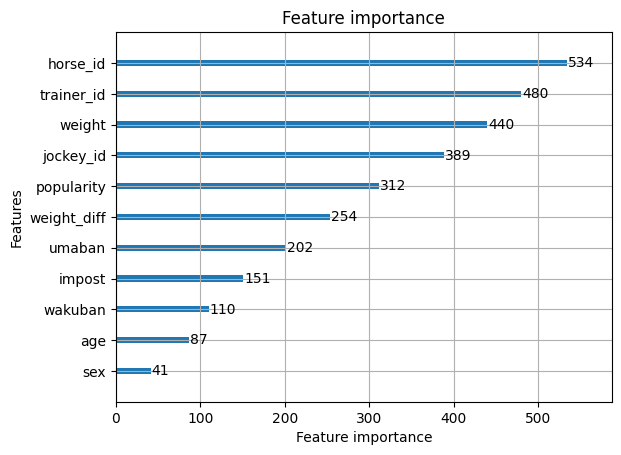

In [131]:
lgb.plot_importance(model)

### 別データで検証

In [108]:
from pathlib import Path

# レース結果テーブルの前処理
other_results_preprocessed = preprpcessing.process_results(
    input_dir=Path("..", "..", "v1_0_1", "data", "rawdf"),
    save_filename="other_results.csv"
)
other_results_preprocessed


,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
10475,202301010101,2021100648,1095,1128,5,1,2,434,-10,23.9,5,55.0,1,1
10476,202301010101,2021100159,1157,1186,6,0,2,454,-6,61.8,7,55.0,2,2
10477,202301010101,2021100265,1197,1192,7,1,2,404,-2,18.8,4,53.0,3,3
10474,202301010101,2021105553,5339,1160,4,1,2,450,2,16.6,3,55.0,4,4
10471,202301010101,2021101429,1170,1026,1,0,2,452,-4,1.2,1,55.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,202309030812,2017106394,1163,1042,9,0,6,482,-2,35.7,7,58.0,6,12
7195,202309030812,2018100985,1034,1033,13,0,5,444,-4,112.4,14,58.0,7,13
7184,202309030812,2019103040,732,1192,2,1,4,468,-10,20.1,6,56.0,7,14
7194,202309030812,2019105860,1193,1073,12,1,4,448,-2,94.3,13,56.0,8,15


In [109]:
other_results_preprocessed["target"] = (other_results_preprocessed["rank"] == 1).astype(int)

In [110]:
len(other_results_preprocessed)

11663

In [111]:
# テストデータに対して予測をしてみる
model.predict(other_results_preprocessed[feature_cols])

array([0.02605271, 0.00703697, 0.04082326, ..., 0.03838331, 0.00475522,
       0.0040637 ])

In [112]:
other_evaluation_df = other_results_preprocessed[
    [
        "race_id",
        "horse_id",
        "target",
        "rank",
        "tansho_odds",
        "popularity"
    ]
].copy()

other_evaluation_df["pred"] = model.predict(other_results_preprocessed[feature_cols])
other_evaluation_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
10475,202301010101,2021100648,0,5,23.9,5,0.026053
10476,202301010101,2021100159,0,6,61.8,7,0.007037
10477,202301010101,2021100265,0,7,18.8,4,0.040823
10474,202301010101,2021105553,0,4,16.6,3,0.032859
10471,202301010101,2021101429,1,1,1.2,1,0.531301
...,...,...,...,...,...,...,...
7191,202309030812,2017106394,0,9,35.7,7,0.008916
7195,202309030812,2018100985,0,13,112.4,14,0.002700
7184,202309030812,2019103040,0,2,20.1,6,0.038383
7194,202309030812,2019105860,0,12,94.3,13,0.004755


In [113]:
bet_df = (
    evaluation_df
    .sort_values("pred", ascending=False)
    .groupby("race_id")
    .head(1)
)
bet_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
61657,202406010508,2020102641,1,1,1.4,1,0.831164
61888,202408010503,2021110067,1,1,1.5,1,0.812426
57812,202409010808,2020103595,0,3,1.5,1,0.781619
41348,202408010607,2020103519,1,1,1.5,1,0.779076
58461,202406010109,2020103679,0,6,1.5,1,0.762900
...,...,...,...,...,...,...,...
40050,202410020411,2019105532,1,1,5.8,3,0.143532
53105,202409010610,2020104497,0,5,5.5,2,0.139196
55920,202410010611,2019105044,0,5,4.6,1,0.138135
19260,202408031210,2020102660,0,3,5.1,1,0.133156


In [114]:
# 的中率
bet_df["target"].mean()

0.3333333333333333

In [115]:
# 返ってくる金額
return_ = ((bet_df["target"] == 1) * bet_df["tansho_odds"]).sum()
return_

1132.0

In [116]:
# かけた金額
cost = len(bet_df)
cost

1461

In [117]:
# 回収率
return_ / cost

0.7748117727583846

### 2024/10/13　秋華賞（race_id=202408050411）に対して予測してみる

In [136]:
# レース結果テーブルの前処理
results20241013_preprocessed = preprpcessing.process_results(
    save_filename="20241013results.csv"
)
results20241013_preprocessed

,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
9,202205050606,2021104855,1102,1112,10,1,3,468,2,125.7,14,55.0,1,1
5,202205050606,2021105801,1092,1163,6,1,3,478,-2,13.5,4,55.0,2,2
14,202205050606,2021105414,1088,1137,15,1,3,524,2,6.8,3,55.0,2,3
6,202205050606,2021106550,1180,1151,7,1,3,458,6,18.1,7,55.0,3,4
0,202205050606,2021105643,5339,1126,1,1,3,490,8,2.3,1,55.0,3,5
10,202205050606,2021102597,660,1111,11,1,3,486,-2,145.2,15,55.0,4,6
7,202205050606,2021105384,1157,1117,8,1,3,460,4,55.5,12,55.0,4,7
8,202205050606,2021106823,1163,1115,9,1,3,444,-10,27.4,9,55.0,5,8
11,202205050606,2021105764,1170,1059,12,1,3,496,12,51.5,11,55.0,5,9
1,202205050606,2021107179,666,1038,2,1,3,448,0,14.6,5,55.0,6,10


In [143]:
# テストデータに対して予測をしてみる
results20241013_preprocessed["pred"] = model.predict(results20241013_preprocessed[feature_cols])

In [148]:
# 確認に必要なデータだけ抽出
df = results20241013_preprocessed[
    [
        "race_id",
        "umaban",
        "rank",
        "pred",
        "tansho_odds",
        "popularity"
    ]
].copy()
df.sort_values("pred", ascending=False)

,race_id,umaban,rank,pred,tansho_odds,popularity
0,202205050606,5,1,0.381429,2.3,1
2,202205050606,14,3,0.356898,3.9,2
14,202205050606,3,15,0.135944,6.8,3
5,202205050606,2,6,0.095358,13.5,4
1,202205050606,10,2,0.050337,14.6,5
13,202205050606,11,14,0.045106,16.7,6
6,202205050606,4,7,0.023618,18.1,7
8,202205050606,8,9,0.015871,27.4,9
12,202205050606,15,13,0.013236,33.0,10
4,202205050606,13,5,0.012217,19.7,8
